## <u>Name </u> : ADVAIT GURUNATH CHAVAN
## <u>Contact No</u> : +91 70214 55852
## <u>Mail ID</u> : advaitchavan135@gmail.com

## Oasis Infobyte Data Science Internship

## Task 1 : Iris Flower Classification

<img src="demo.png" height = "1000px" width = "2000px"></img>


### 1. Importing the necessary dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from warnings import filterwarnings
filterwarnings(action='ignore')

### 2. Exploring the dataset 

In [2]:
iris_data = pd.read_csv('iris.csv')
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### So, we have 150 rows and 6 columns and there are no null values or blank spaces in our dataset.

### Hence, there is no need of imputing(filling up blank spaces with mean/median/mode values) the dataset

In [4]:
iris_data['SepalLengthCm'].max(), iris_data['SepalLengthCm'].min()

(7.9, 4.3)

In [5]:
iris_data['SepalWidthCm'].max(), iris_data['SepalWidthCm'].min()

(4.4, 2.0)

In [6]:
iris_data['PetalLengthCm'].max(), iris_data['PetalLengthCm'].min()

(6.9, 1.0)

In [7]:
iris_data['PetalWidthCm'].max(), iris_data['PetalWidthCm'].min()

(2.5, 0.1)

In [8]:
iris_data['Species'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [9]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

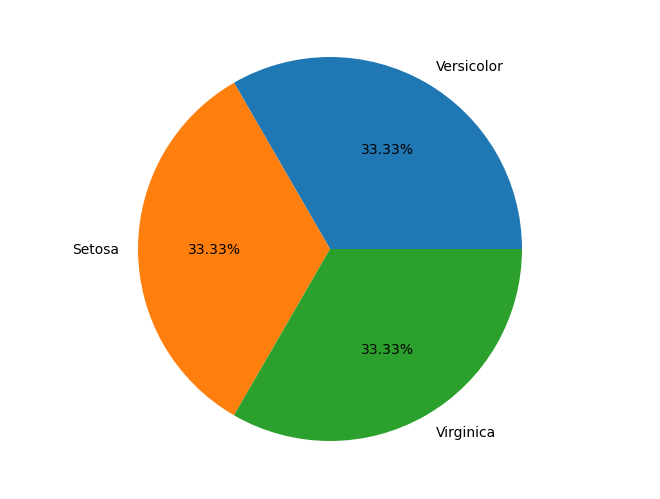

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

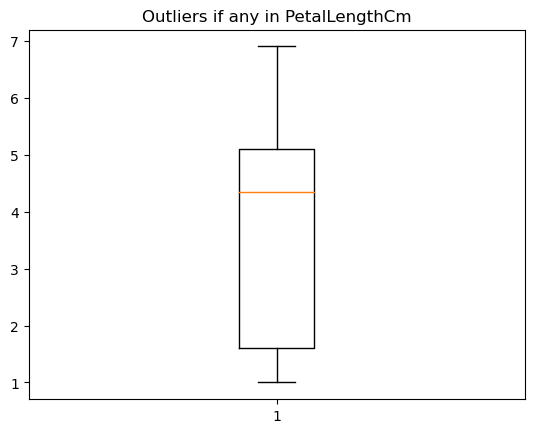

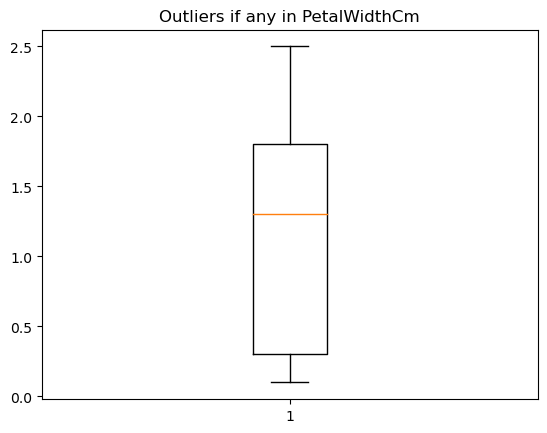

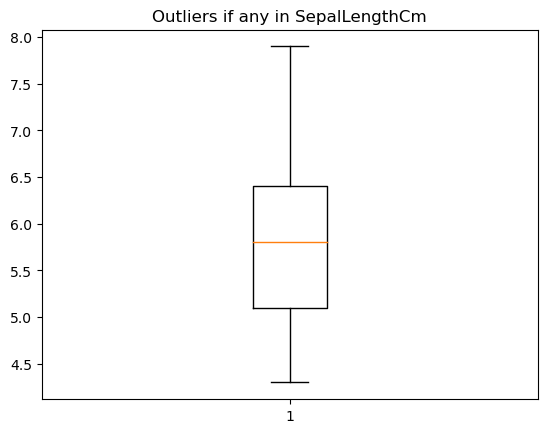

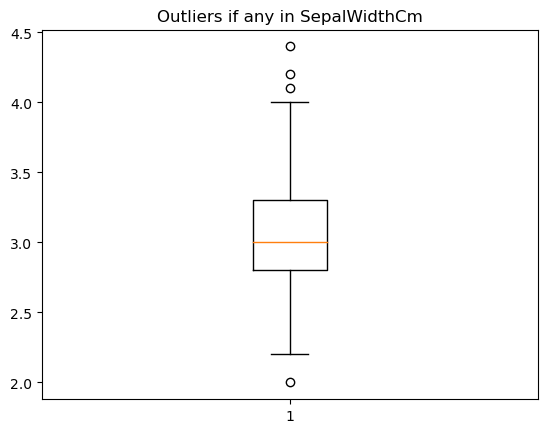

In [11]:
plt.figure(1)
plt.boxplot([iris_data['PetalLengthCm']])
plt.title('Outliers if any in PetalLengthCm')
plt.figure(2)
plt.boxplot([iris_data['PetalWidthCm']])
plt.title('Outliers if any in PetalWidthCm')
plt.figure(3)
plt.boxplot([iris_data['SepalLengthCm']])
plt.title('Outliers if any in SepalLengthCm')
plt.figure(4)
plt.boxplot([iris_data['SepalWidthCm']])
plt.title('Outliers if any in SepalWidthCm')
plt.show()

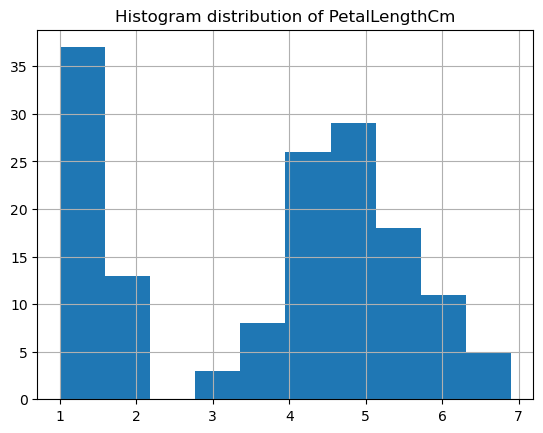

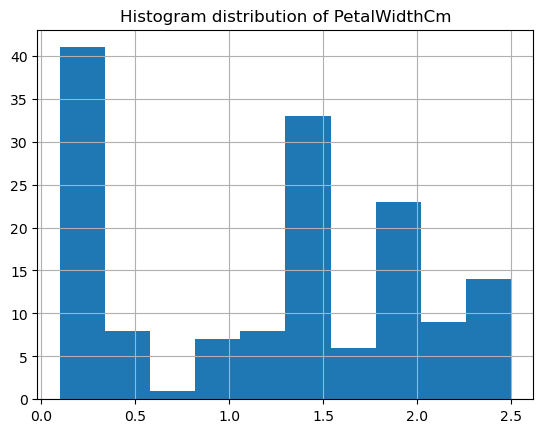

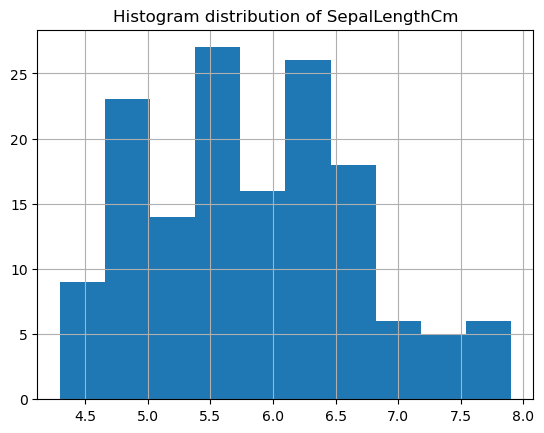

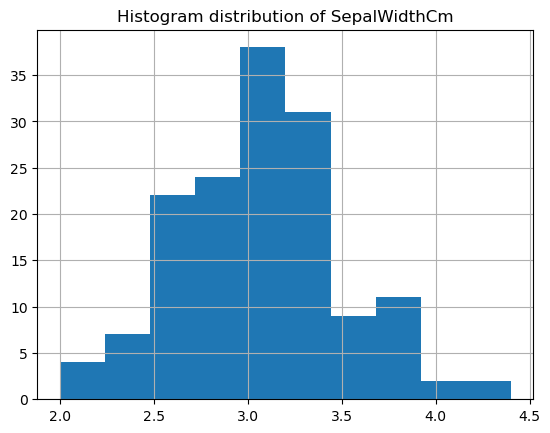

In [12]:
plt.figure(1)
iris_data['PetalLengthCm'].hist()
plt.title('Histogram distribution of PetalLengthCm')

plt.figure(2)
iris_data['PetalWidthCm'].hist()
plt.title('Histogram distribution of PetalWidthCm')

plt.figure(3)
iris_data['SepalLengthCm'].hist()
plt.title('Histogram distribution of SepalLengthCm')

plt.figure(4)
iris_data['SepalWidthCm'].hist()
plt.title('Histogram distribution of SepalWidthCm')
plt.show()

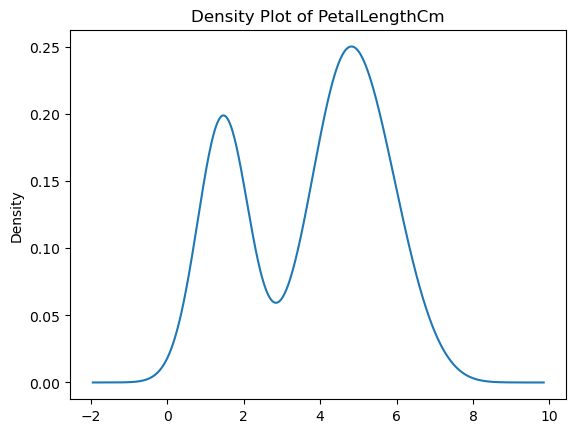

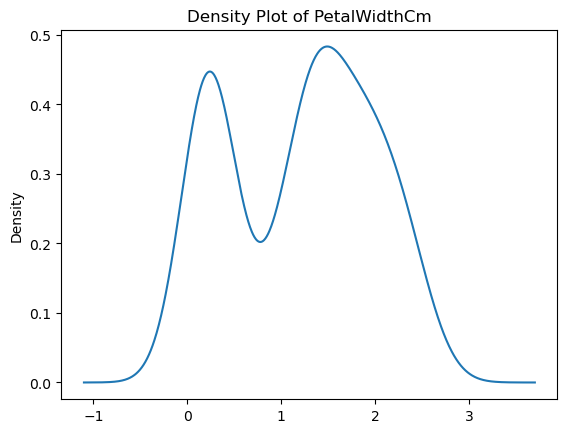

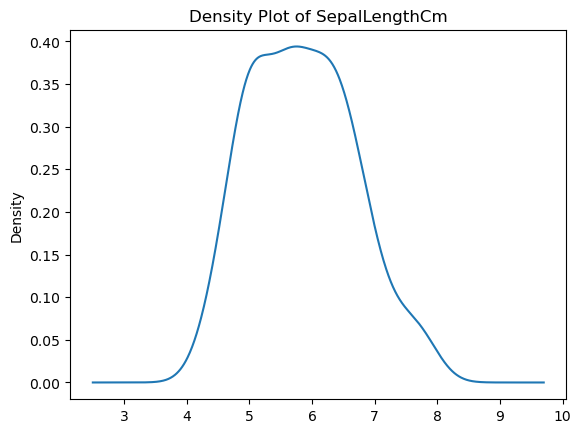

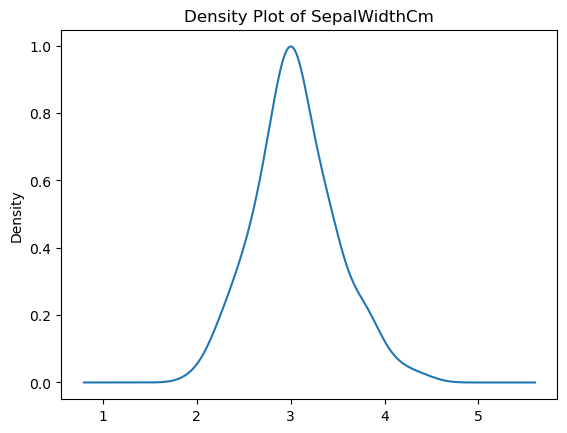

In [13]:
plt.figure(1)
iris_data['PetalLengthCm'].plot(kind ='density')
plt.title('Density Plot of PetalLengthCm')

plt.figure(2)
iris_data['PetalWidthCm'].plot(kind ='density')
plt.title('Density Plot of PetalWidthCm')

plt.figure(3)
iris_data['SepalLengthCm'].plot(kind ='density')
plt.title('Density Plot of SepalLengthCm')

plt.figure(4)
iris_data['SepalWidthCm'].plot(kind ='density')
plt.title('Density Plot of SepalWidthCm')

plt.show()

Text(0.5, 1.0, 'Species vs SepalWidthCm')

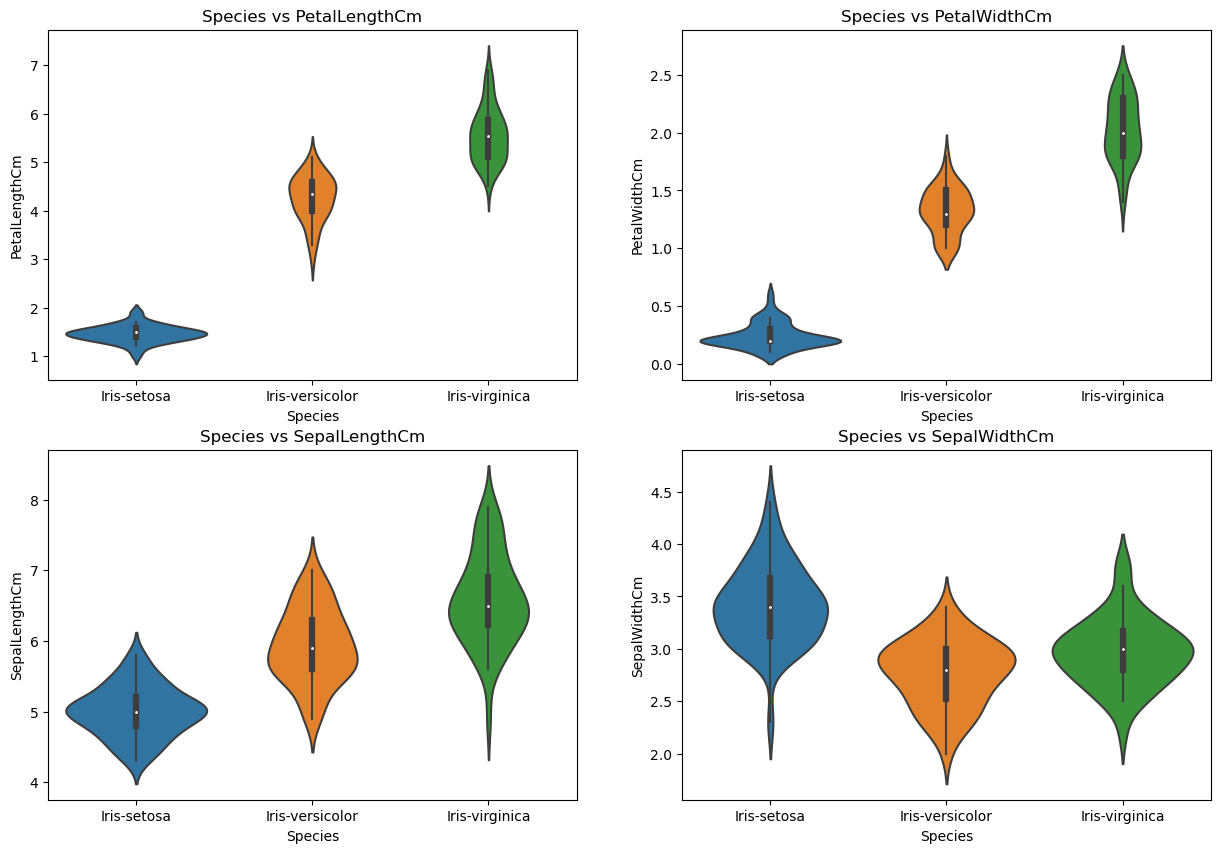

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris_data)
plt.title('Species vs PetalLengthCm')

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris_data)
plt.title('Species vs PetalWidthCm')

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris_data)
plt.title('Species vs SepalLengthCm')

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris_data)
plt.title('Species vs SepalWidthCm')

In [15]:
iris_data.iloc[:,1:-1].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

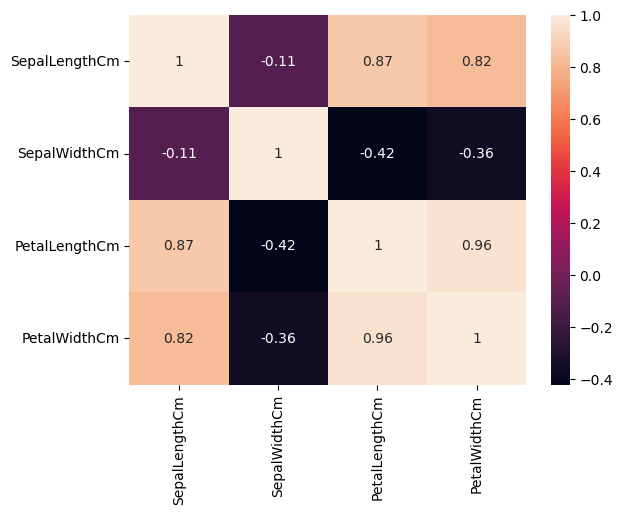

In [16]:
sns.heatmap(iris_data.iloc[:,1:-1].corr(), annot=True)

#### From the above heatmap of correlation of features that define the flower we can infer that <u>PetalLengthCm</u> has the more
#### influence on determining the species of flower

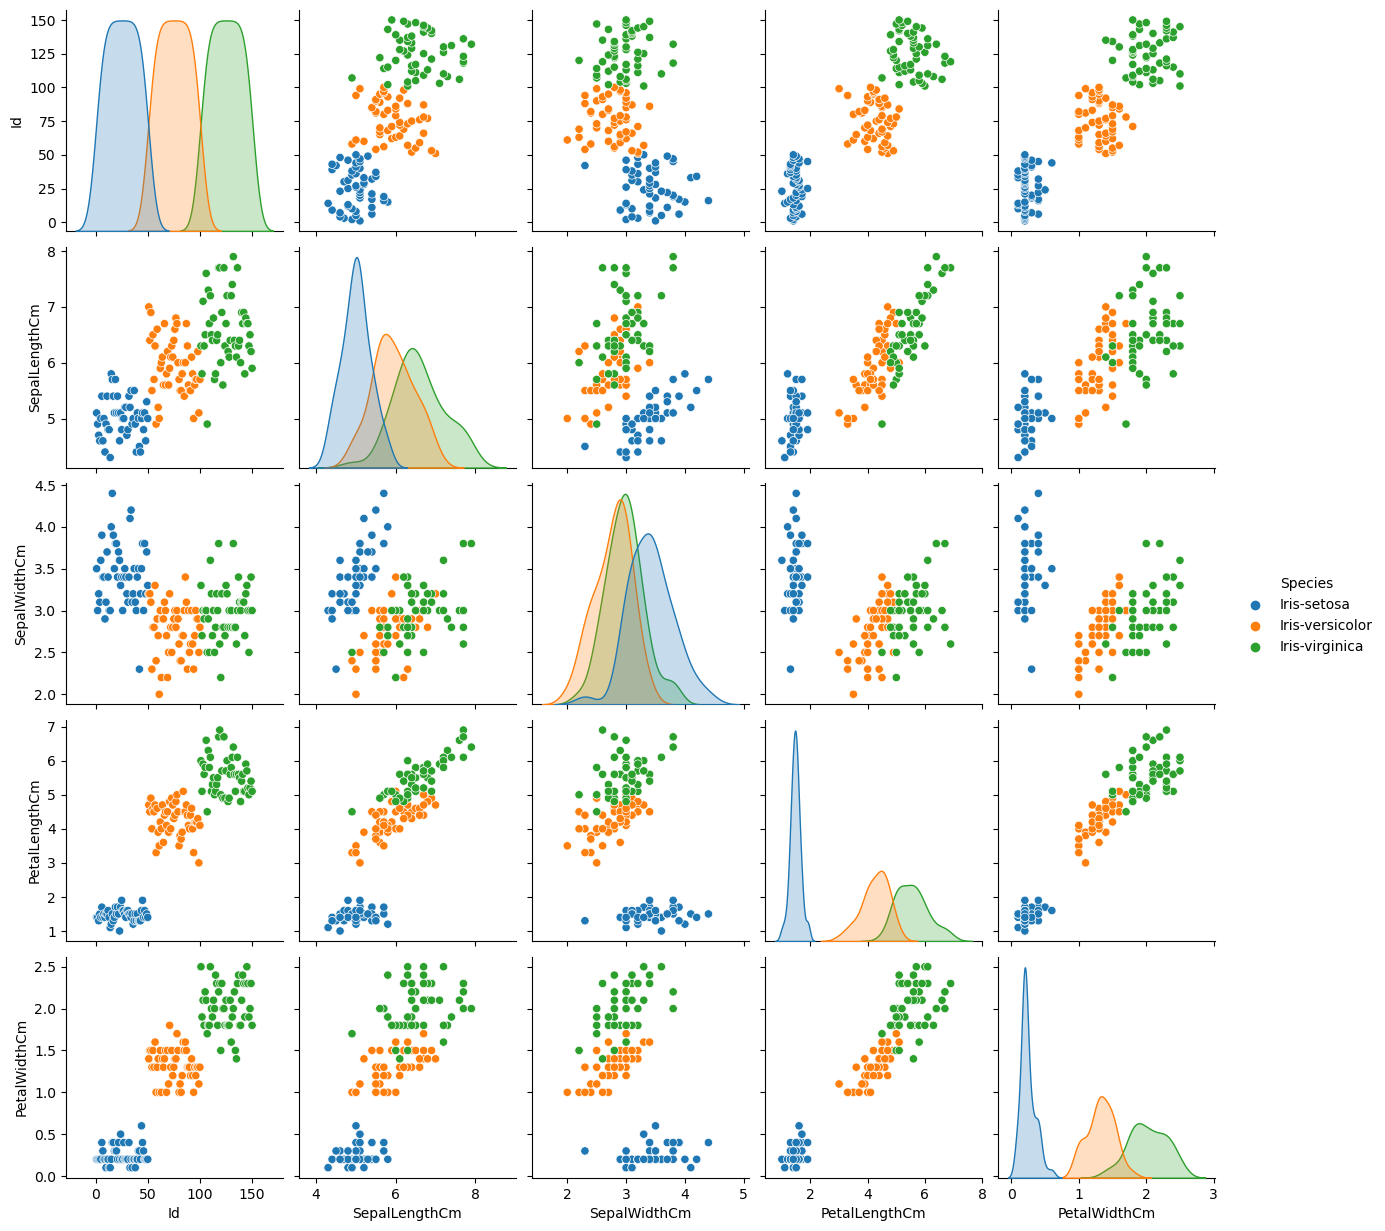

In [17]:
sns.pairplot(iris_data, hue="Species")

### 3. Preparing the data for training and testing of model

In [18]:
x = iris_data.iloc[:, 1:-1] 
y = iris_data.Species
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3)

### 4. Training using Decision Tree Model

In [19]:
model_1 = DecisionTreeClassifier() 
model_1.fit(x_train, y_train) 

DecisionTreeClassifier()

### 5. Evaluating the performance by Decision Tree Model

In [20]:
y_pred = model_1.predict(x_test) 
score = accuracy_score(y_pred, y_test) 
score

0.9555555555555556

In [21]:
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [22]:
print(classification_report(y_pred, y_test)) 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



[Text(0.3076923076923077, 0.9166666666666666, 'X[2] <= 2.6\ngini = 0.666\nsamples = 105\nvalue = [35, 36, 34]'),
 Text(0.23076923076923078, 0.75, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.38461538461538464, 0.75, 'X[2] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 36, 34]'),
 Text(0.15384615384615385, 0.5833333333333334, 'X[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.23076923076923078, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.5833333333333334, 'X[3] <= 1.75\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(0.38461538461538464, 0.4166666666666667, 'X[0] <= 6.2\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.46153846153846156, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.3846

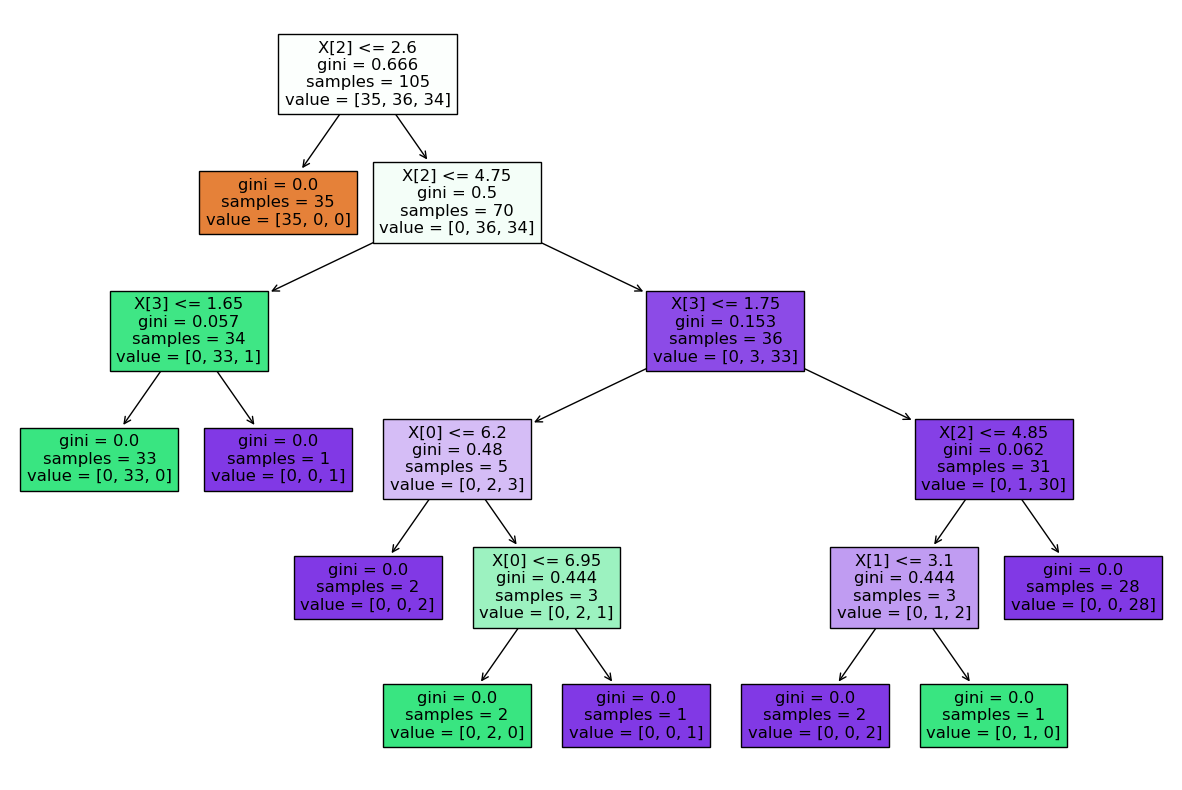

In [23]:
plt.figure(figsize=(15, 10)) 
tree.plot_tree(model_1, filled=True) 

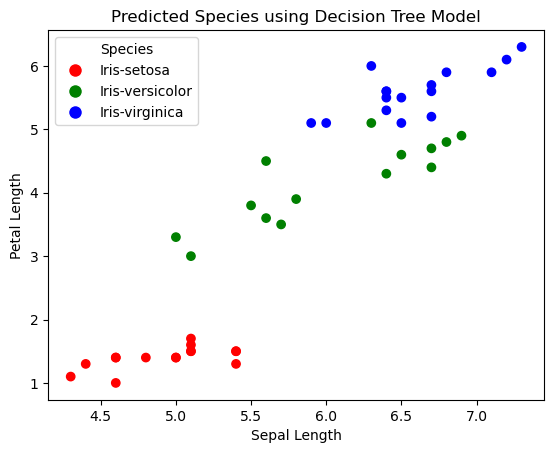

In [24]:
color_class = {
    'Iris-setosa' : 'red',
    'Iris-versicolor' : 'green',
    'Iris-virginica' : 'blue'
}

colors = [color_class[label] for label in y_pred]

plt.scatter(x_test.SepalLengthCm, x_test.PetalLengthCm, c=colors)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Predicted Species using Decision Tree Model')
legend_entries = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
    for label, color in color_class.items()
]
plt.legend(handles=legend_entries, title='Species')
plt.show()

#### From the above Tree Plot and Predicted Species using Decision Tree Model we can infer the following:-
#### If Petal Length <= 2.45cm then the Species of the flower is Setosa.
#### If Petal Length > 2.45 cm then the Specis of the flower may be Versicolor or Virginica
#### For Petal Length > 3 and Petal Length < 5 most of the Species are Versicolor 

In [25]:
iris_setosa_dataset = iris_data[iris_data.PetalLengthCm <= 2.45]
iris_setosa_dataset.to_excel('iris_setosa_dataset.xlsx',index=False)
iris_setosa_dataset.to_csv('iris_setosa_dataset.csv',index=False)
pd.read_excel('iris_setosa_dataset.xlsx')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [26]:
iris_versicolor_dataset = iris_data[(iris_data['PetalLengthCm'] < 5) & (iris_data['PetalLengthCm'] > 3)]
iris_versicolor_dataset.to_excel('iris_versicolor_dataset.xlsx',index=False)
iris_versicolor_dataset.to_csv('iris_versicolor_dataset.csv',index=False)
pd.read_excel('iris_versicolor_dataset.xlsx')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,51,7.0,3.2,4.7,1.4,Iris-versicolor
1,52,6.4,3.2,4.5,1.5,Iris-versicolor
2,53,6.9,3.1,4.9,1.5,Iris-versicolor
3,54,5.5,2.3,4.0,1.3,Iris-versicolor
4,55,6.5,2.8,4.6,1.5,Iris-versicolor
5,56,5.7,2.8,4.5,1.3,Iris-versicolor
6,57,6.3,3.3,4.7,1.6,Iris-versicolor
7,58,4.9,2.4,3.3,1.0,Iris-versicolor
8,59,6.6,2.9,4.6,1.3,Iris-versicolor
9,60,5.2,2.7,3.9,1.4,Iris-versicolor


In [27]:
iris_virginica_dataset = iris_data[(iris_data['PetalLengthCm'] > 5)]
iris_virginica_dataset.to_csv('iris_virginica_dataset.csv',index=False)
pd.read_excel('iris_virginica_dataset.xlsx')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,84,6.0,2.7,5.1,1.6,Iris-versicolor
1,101,6.3,3.3,6.0,2.5,Iris-virginica
2,102,5.8,2.7,5.1,1.9,Iris-virginica
3,103,7.1,3.0,5.9,2.1,Iris-virginica
4,104,6.3,2.9,5.6,1.8,Iris-virginica
5,105,6.5,3.0,5.8,2.2,Iris-virginica
6,106,7.6,3.0,6.6,2.1,Iris-virginica
7,108,7.3,2.9,6.3,1.8,Iris-virginica
8,109,6.7,2.5,5.8,1.8,Iris-virginica
9,110,7.2,3.6,6.1,2.5,Iris-virginica


### 6. Training using LinearRegressionModel

In [28]:
model_2 = LogisticRegression()

In [29]:
model_2.fit(x_train,y_train)

LogisticRegression()

### 7. Evaluating the performance using  LinearRegressionModel

In [30]:
y_pred_2 = model_2.predict(x_test)
y_pred_2

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [31]:
confusion_matrix(y_test,y_pred_2)

array([[15,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 16]], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred_2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [33]:
accuracy_score(y_test,y_pred_2)

0.9777777777777777

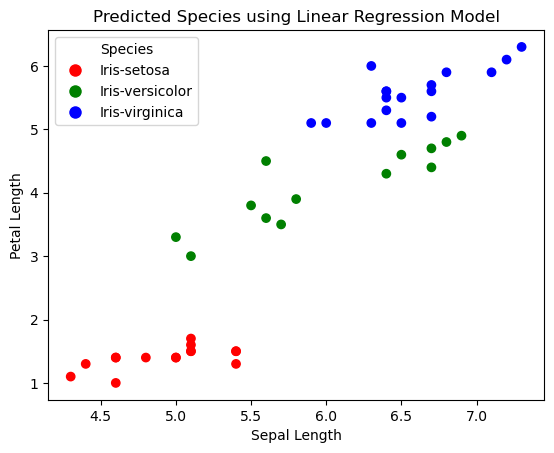

In [34]:
color_class = {
    'Iris-setosa' : 'red',
    'Iris-versicolor' : 'green',
    'Iris-virginica' : 'blue'
}

colors = [color_class[label] for label in y_pred_2]

plt.scatter(x_test.SepalLengthCm, x_test.PetalLengthCm, c=colors)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Predicted Species using Linear Regression Model')
legend_entries = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
    for label, color in color_class.items()
]
plt.legend(handles=legend_entries, title='Species')
plt.show()

### 8. Training using Linear Sub Vector Machine (SVM)

In [35]:
model_3 = LinearSVC()
model_3.fit(x_train, y_train)

LinearSVC()

### 9. Evaluating the performance using the Linear Sub Vector Machine (SVM)

In [36]:
y_pred_3 = model_3.predict(x_test)
y_pred_3

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [37]:
print(confusion_matrix(y_test, y_pred_3))

[[15  0  0]
 [ 0 13  1]
 [ 0  1 15]]


In [38]:
print(classification_report(y_test, y_pred_3))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [39]:
print(accuracy_score(y_test,y_pred_3))

0.9555555555555556


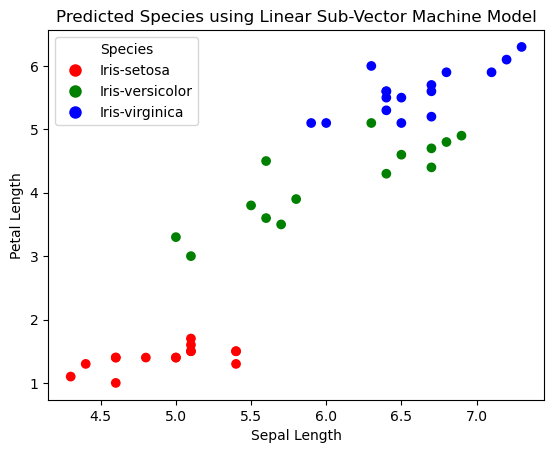

In [40]:
color_class = {
    'Iris-setosa' : 'red',
    'Iris-versicolor' : 'green',
    'Iris-virginica' : 'blue'
}

colors = [color_class[label] for label in y_pred_3]

plt.scatter(x_test.SepalLengthCm, x_test.PetalLengthCm, c=colors)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Predicted Species using Linear Sub-Vector Machine Model')
legend_entries = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
    for label, color in color_class.items()
]
plt.legend(handles=legend_entries, title='Species')
plt.show()

### 10. Training using Random Forest Classifier

In [41]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
y_pred_4 = classifier.predict(x_test)
y_pred_4

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

### 11. Evaluation using Random Forest Classifier

In [43]:
accuracy = classifier.score(x_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


In [44]:
print(confusion_matrix(y_test, y_pred_4))

[[15  0  0]
 [ 0 13  1]
 [ 0  0 16]]


In [45]:
print(classification_report(y_test, y_pred_4))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [46]:
print(accuracy_score(y_test,y_pred_4))

0.9777777777777777


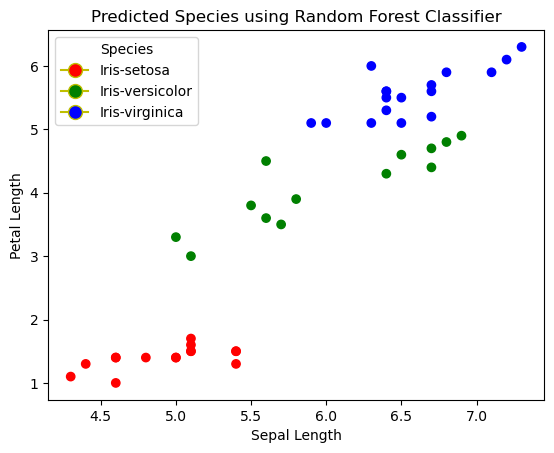

In [47]:
color_class = {
    'Iris-setosa' : 'red',
    'Iris-versicolor' : 'green',
    'Iris-virginica' : 'blue'
}

colors = [color_class[label] for label in y_pred_4]

plt.scatter(x_test.SepalLengthCm, x_test.PetalLengthCm, c=colors)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Predicted Species using Random Forest Classifier')
legend_entries = [
    plt.Line2D([0], [0], marker='o', color='y', markerfacecolor=color, markersize=10, label=label)
    for label, color in color_class.items()
]
plt.legend(handles=legend_entries, title='Species')
plt.show()

### 12 Final Conclusion 

#### Hence, we have classified the Iris Flower Dataset using four Classification Models namely Decision Tree Model, Linear Regression Model, Linear SVC Model and Random Forest Classifier

### In, first three cases i.e. using Linear Regression Model and Random Forest Classifier Model  we achieved an overall accuracy score of 0.98; incase of Sub-vector Machine Model and Decision Tree Model we achieved an accuracy of 0.96

#### From the Multi-class classification plot we can conclude that 
### <p style="color: red;">1. For Flowers have Petal Length < 2.45 cm, belong to Setosa Species</p>
### <p style="color: red;">2. For Flowers having Petal Length > 3cm and Petal Length < 5cm, most of them belong Versicolor Species </p>
### <p style="color: red;"> 3. For Flowers having Petal Length > 5cm, belong to Virginca Species
</p>